## Final Project Submission

Please fill out:
* Student name: Mary Edith,Geoffrey Shikanda,Diana,jossjol oduol
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 22/7/2024 00:00
* Instructor name: 
* Blog post URL:


*IMPORT LIBRARIES*

# BUSINESS PROBLEM
This model is aimed at trying to analyse the housing data from King County House Sales dataset and trying to come up with a reliable model that can be transformed into a pipeline to be used by the real estate stakeholders.the main purpose of this model is to tell the stake holder which house to buy/invest in given the variables:squarefoot living,number of bedrooms and condition of the house.

# BUSINESS UNDERSTANDING
The methodology used in this project is CRoss-INDUSTRY STANDARD PROCESS FOR DATA MINING\
This project is about housing data and it is to help real estate owners into making decision on which house to buy and sell.
through the analysis using the regression model we will be able to analyse the correlation between different variables and the prediction/forecasting.
This data is available at  King County House Sales dataset

# DATA UNDERSTANDING
The data is found at  King County House Sales dataset,which has a total number of 21597 rows and  21 columns.
The predictors for this model is the Square footage of the home ,number of bedrooms and condition of the house (sqft_living,bedrooms,condition)
The target will be the price of the homes


# DATA PREPARATION
* The null values in the dataset will either be removed or replaced with mean and median
* Numeric values encoded as strings will be converted to numeric
* Multicollinearity will be looked into and removed,then we will normalize the numeric data 
and lastly convert categorical data into numeric

# MODELLING
* the model will use a regression task since we are comparing the relationship between input variable and a continous output variable.in this we will use the linear regression algorithm.
* we will detect overfitting using cross-validation and we will use regularization to mitigate overfitting if any.
*  cross validation will be used to ensure our data works well on unseen data
*  mean squared error will be used to evaluating how well your model's predictions match the actual data
*  

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


LOAD THE DATA

In [3]:
# Your code here - remember to use markdown cells for comments as well!
kc_house=pd.read_csv(r'data\kc_house_data.csv')
df=pd.DataFrame(kc_house)


# DATA PREPARATION

DATA UNDERSTANDING

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
# CHANGE DATE FROM OBJECT TO DATE
kc_house['date']=pd.to_datetime(kc_house['date']).copy()

checking on the varoius unique values in the dataset

In [25]:
print(kc_house.nunique())

id               20970
date               372
price             3581
bedrooms            12
bathrooms           29
sqft_living       1025
sqft_lot          9643
floors               6
waterfront           2
view                 6
condition        20970
grade               11
sqft_above         935
sqft_basement      303
yr_built           116
yr_renovated        69
zipcode             70
lat               5018
long               750
sqft_living15      773
sqft_lot15        8572
dtype: int64


There are a total of 173 duplicates ids  in the dataset,this we will drop

In [26]:
#LOOK FOR DUPLICATES
kc_house['id'].duplicated().sum()

173

In [28]:
kc_house = kc_house.drop_duplicates(subset='id')
#confirm the duplicates have been dropped
kc_house['id'].duplicated().sum()


0

In [8]:
kc_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The dataset has a total number of 21597 rows and 21 columns

In [9]:
kc_house.shape

(21597, 21)

In [10]:
kc_house.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [11]:
kc_house.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [12]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

we will have to look for corrilation

In [30]:
kc_house.corr()['price']

id              -0.017546
date            -0.001501
price            1.000000
bedrooms         0.309799
bathrooms        0.526035
sqft_living      0.702199
sqft_lot         0.087132
floors           0.255810
waterfront       0.266562
view             0.394746
grade            0.667749
sqft_above       0.604977
sqft_basement    0.324712
yr_built         0.053373
yr_renovated     0.117346
zipcode         -0.052067
lat              0.305520
long             0.020973
sqft_living15    0.585646
sqft_lot15       0.082763
Name: price, dtype: float64

The best correlations with price are:

* sqft_living: 0.702328
* grade: 0.667738
* sqft_above: 0.605143
* sqft_living15: 0.586415
* bathrooms: 0.525889

therefore this means that:
sqft_living (0.702328): has a strong positive correlation between the square footage of the living area and the price of the house. As the living area increases, the price tends to increase as well.

grade (0.667738): This also shows a strong positive correlation. Grade refers to the quality of the construction and design of the house, and higher grades are associated with higher prices.

sqft_above (0.605143): This suggests a strong positive correlation between the square footage above ground and the price. More above-ground living space typically leads to a higher house price.

sqft_living15 (0.586415): This shows a strong positive correlation with the price, referring to the average square footage of living space for the 15 nearest houses.

bathrooms (0.525889): This indicates a moderate to strong positive correlation between the number of bathrooms and the price. More bathrooms generally increase the house's value.


however in our case we will look at the variables number of bedrooms which has a correlation of 0.309 or 31% and condition of the house with square foot living and its impact on the pricing of the house

LOOKING FOR COLLINEARITY AMONG BEDROOMS ,SQUAREFEET LIVING AND CONDITION OF THE HOUSELOOKING

In [14]:
#looking for collinearity
y=df['price']
independent_var=kc_house[['bedrooms','sqft_living','condition']]
corr_matrix=independent_var.corr()
print(corr_matrix)

             bedrooms  sqft_living  condition
bedrooms     1.000000     0.578212   0.026496
sqft_living  0.578212     1.000000  -0.059445
condition    0.026496    -0.059445   1.000000


* There is a moderate positive correlation between the number of bedrooms and the square footage of the living space. This makes sense because larger houses typically have more bedrooms.
* There is a very weak positive correlation between the number of bedrooms and the condition of the house, suggesting that the number of bedrooms does not significantly relate to the house condition.
* There is a very weak negative correlation between the square footage of the living space and the condition of the house, indicating that the size of the house does not significantly affect its condition.

  CHECK THE NULL VALUES IN THE DATASET

In [15]:
kc_house.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

FILL THE NULL VALUES FOR VIEW WITH THE MEAN.

Since the null values for view are 63,which is a considerable lower number ,replacing it with mean will bring no harm 

In [16]:
#fill view null values with mean
view_mean=kc_house['view'].mean()
kc_house['view']=kc_house['view'].fillna(view_mean)

FILL NULL VALUES WITH MEDIAN FOR YEAR RENOVATED



In [17]:
#fill yr_renovated null values with median
yr_ren_median=kc_house['yr_renovated'].median()
kc_house['yr_renovated']=kc_house['yr_renovated'].fillna(yr_ren_median)

FILL NULL VALUES WITH MEDIAN FOR WATERFRONT

In [18]:
#fill waterfront null values with median 
waterf_median=kc_house['waterfront'].median()
kc_house['waterfront']=kc_house['waterfront'].fillna(waterf_median)

DROP NON VALUE (? ) IN THE DATAFRAME

In [19]:
kc_house=kc_house.replace('?',np.nan)
kc_house=kc_house.apply(pd.to_numeric,errors='coerce')
kc_house=kc_house.dropna()

CONFIRM NULL VALUES

In [20]:
#confirm null values
kc_house.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# DATA MODELLING

USING ONE HOT ENCODING

In [32]:
#using one hot encoding on condition of the house
kc_house['condition']= pd.get_dummies(df,columns=['condition'],prefix='condition')
kc_house['condition']

0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21592     263000018
21593    6600060120
21594    1523300141
21595     291310100
21596    1523300157
Name: condition, Length: 20970, dtype: object

LOOK FOR MULTICOLLINEARITY

In [35]:

x = add_constant(independent_var)
vif_data = pd.DataFrame()
vif_data['Variable'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_data)


      Variable        VIF
0        const  41.202975
1     bedrooms   1.510682
2  sqft_living   1.514975
3    condition   1.009183


the VIF for the predictors are within range so i will not drop any

NORMALIZING THE DATA

This will help the data to be in one scale without distorting difference

In [36]:
numeric_columns=['bedrooms','sqft_living','condition']
scaler= StandardScaler()
kc_house[numeric_columns] = scaler.fit_transform(kc_house[numeric_columns])
print(kc_house[numeric_columns].head())


   bedrooms  sqft_living  condition
0 -0.404001    -0.983112   0.885736
1 -0.404001     0.528954   0.637086
2 -1.486119    -1.429117   0.365003
3  0.678117    -0.134615  -0.728159
4 -0.404001    -0.439203  -0.913395


In [38]:
#fit the model
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     7625.
Date:                Wed, 24 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:31:17   Log-Likelihood:            -2.9959e+05
No. Observations:               21597   AIC:                         5.992e+05
Df Residuals:                   21593   BIC:                         5.992e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.497e+04   1.12e+04     -7.598      

* This indicates that for each additional bedroom, the price of the house is expected to decrease by $61,000, holding all other variables constant.
The p-value is 0.000, indicating that this coefficient is statistically significant.

* This indicates that for each additional square foot of living space, the price of the house is expected to increase by approximately $318.53, holding all other variables constant.
The p-value is 0.000, indicating that this coefficient is statistically significant.


* This indicates that for each one-unit increase in the condition rating, the price of the house is expected to increase by approximately $49,390, holding all other variables constant.
The p-value is 0.000, indicating that this coefficient is statistically significant.

VISUALIZING ERROR

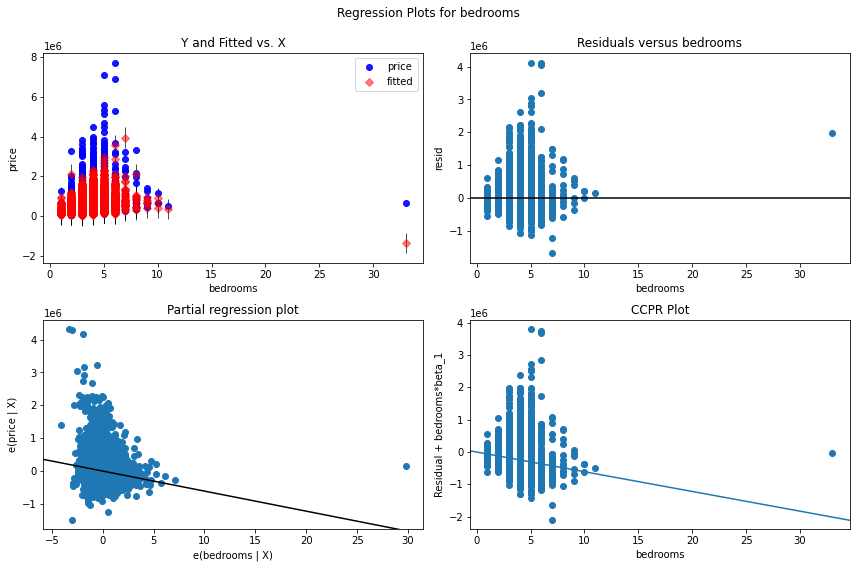

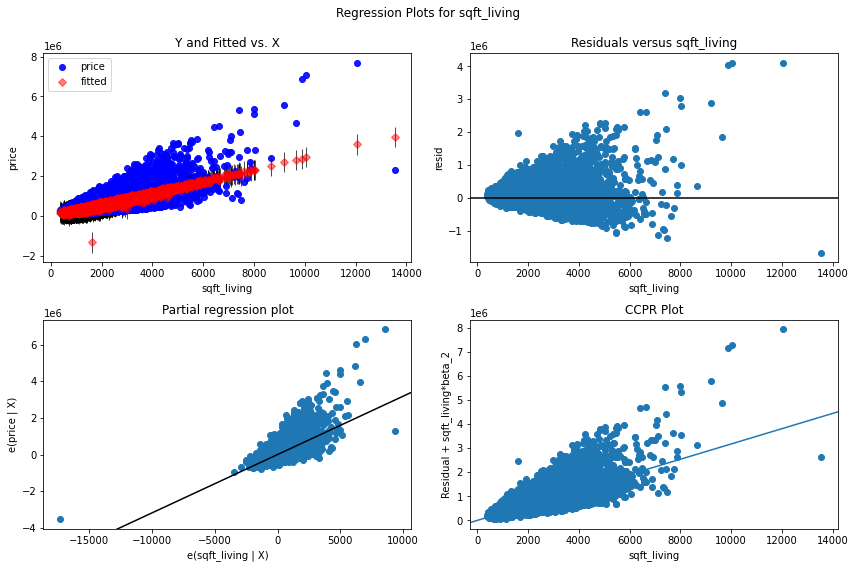

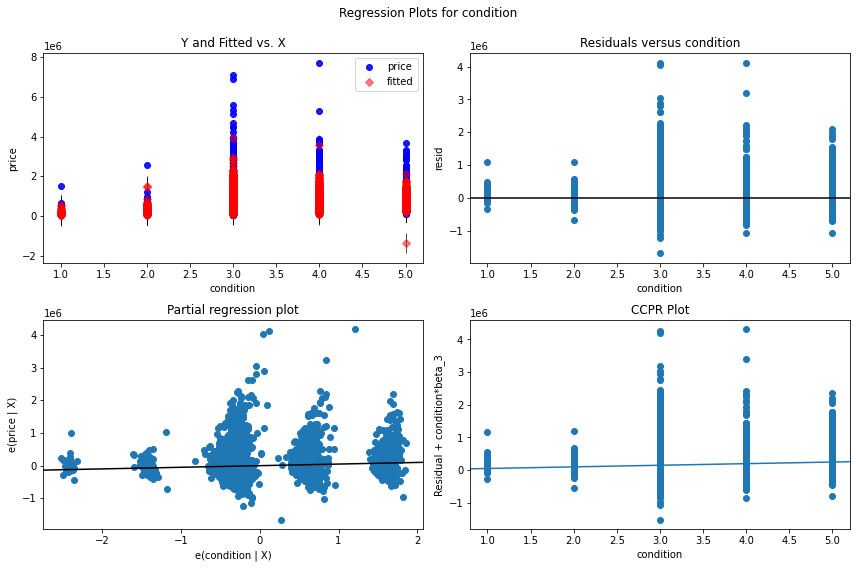

In [43]:

def plot_regress_exog(model, exog_name):
    fig = plt.figure(figsize=(12, 8))
    fig = sm.graphics.plot_regress_exog(model, exog_name, fig=fig)
    plt.show()

# Plot for each variable
plot_regress_exog(model, 'bedrooms')
plot_regress_exog(model, 'sqft_living')
plot_regress_exog(model, 'condition')

VISUALIZATION

RESIDUAL AND LOG TRANSFORMATION

<ipython-input-104-8c4a1944e451>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


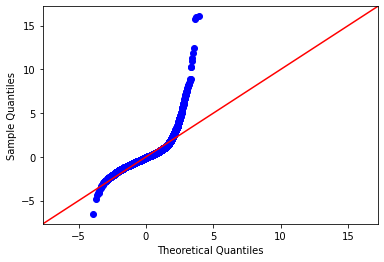

In [ ]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

This indicates that the residuals do not follow a normal distribution. Specifically:
* Lower Tail (bottom-left): Residuals are below the line, indicating that the lower quantiles are less than expected.
* Upper Tail (top-right): Residuals are above the line, indicating that the upper quantiles are greater than expected.

* we will therefore do a log transformation

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     6739.
Date:                Mon, 22 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:57:18   Log-Likelihood:                -9348.7
No. Observations:               21143   AIC:                         1.871e+04
Df Residuals:                   21139   BIC:                         1.874e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0484      0.003   5038.571      

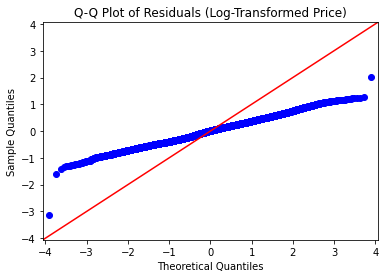

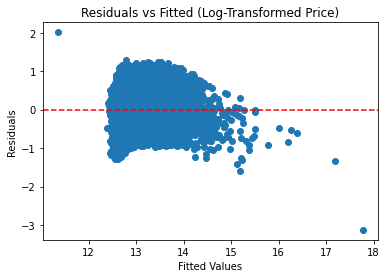

In [ ]:
# Log transform the dependent variable
kc_house['log_price'] = np.log(kc_house['price'])

# Independent variables
X = kc_house[['bedrooms', 'sqft_living', 'condition']]
# Dependent variable (log-transformed price)
y = kc_house['log_price']

# Add a constant to the model (intercept term)
X = sm.add_constant(X)

# Fit the model
log_model = sm.OLS(y, X).fit()

# Print the model summary
print(log_model.summary())

# Plotting Q-Q plot for the new residuals
sm.qqplot(log_model.resid, line='45')
plt.title('Q-Q Plot of Residuals (Log-Transformed Price)')
plt.show()

# Plotting Residuals vs Fitted for the new model
plt.scatter(log_model.fittedvalues, log_model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Log-Transformed Price)')
plt.show()

The new Q-Q plot will help assess whether the log transformation improved the normality of the residuals. Ideally, the points should lie closer to the red line

In the plot, the residuals show a funnel shape, widening as the fitted values increase. This indicates heteroscedasticity, meaning the variance of the residuals is not constant across all levels of the fitted values.

# TRAIN- TEST- SPLIT AND DETECTING OVERFITTING

In [ ]:
#TRAIN
train=kc_house.drop(['id','date','price'],axis=1)
test=kc_house['price']

The test size is 20%,leaving 80% for training data

In [ ]:
#split the data into train and test
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=42)

TRAIN THE MODEL

In [ ]:
model=LinearRegression()

In [ ]:
# an error occured because the data set had "?" value instead of numeric value
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred=model.predict(x_test)

In [ ]:
pred

array([1021642.20445007,   47868.25699992,  462907.48225683, ...,
        227940.72151419,  617433.05006363,  474471.59953065])

In [ ]:
#EVALUATE THE MODEL
score=model.score(x_test,y_test)
score

0.8336916190592161

DETECTING OVERFITTING

In [ ]:
# using train test perfomance gap to detect overfitting
# Predict on the training set
y_train_pred = model.predict(x_train)
# Predict on the test set
y_test_pred = model.predict(x_test)

# Calculate Mean Squared Error for both sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Training MSE: 21914168191.574978
Test MSE: 21929113394.058353


show that the training and test MSE values are very close to each other. This suggests that the model is generalizing well and not overfitting. Both training and test MSE are similar, indicating that the model performs consistently across both training and unseen test data.

cross validation for unseen data

In [ ]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores
print(f'Cross-Validation MSE Scores: {cv_scores}')
print(f'Average Cross-Validation MSE: {np.mean(cv_scores)}')

Cross-Validation MSE Scores: [0.14786351 0.14433003 0.14272411 0.14793175 0.12698076]
Average Cross-Validation MSE: 0.14196603062635588


* MSE Scores: The individual cross-validation MSE scores are relatively close to each other, indicating that the model's performance is consistent across different subsets of the data.

* Average Cross-Validation MSE: The average MSE of approximately 0.142 gives you an estimate of the model's performance across different folds. Lower MSE values suggest better model performance.

# MODEL EVALUATION
The model has proven to be authentically useful in the prediction of the data in the kc_housing.this model can be used to give insight into the housing industry,the various variables to be considered and the best possible way to maximize profits and minimise losses.

# DEPLOYMENT
The model can be deployed after a thorough proofe of concept and being successful,then we will be confident the model can be released into the wild and automating ETL.